In [3]:
import requests
import pandas as pd
import json
import time
from utils.utils import fmt_date_from_unix, dashed_print, inline_print
import psycopg2 as pg2
from urllib.parse import urlparse
from dotenv import load_dotenv
import os


COLUMNS = ["underlyer", "spot_ref", "expiration_date", "contract_type",
               "strike", "iv", "delta", "theta", "vega", "indic", "description", "quote_time"]
URL = "aevo_api_url"
from fetch_quotes import fetch_quotes, parse_quotes

In [4]:
#this is sample response
data={"expiries": {
        "weekly": 1690531200,
        "biweekly": 1691136000,
        "monthly": 1690531200,
        "triweekly": 1691740800,
        "next_month": 1692950400
    },
    "data": [
        {
            "underlyer": "BTC",
            "spot_ref": "29917.62",
            "prices": {
                "weekly": {
                    "call": [
                        {
                            "strike": "29500.00",
                            "iv": "35.4",
                            "delta": "0.6549",
                            "theta": "-43.2436",
                            "vega": "12.8059",
                            "indic": "735.0469986591379"
                        },
                        {
                            "strike": "30000.00",
                            "iv": "34.5",
                            "delta": "0.4845",
                            "theta": "-45.6360",
                            "vega": "13.8547",
                            "indic": "447.202123082403"
                        },
                        {
                            "strike": "30500.00",
                            "iv": "35.7",
                            "delta": "0.3223",
                            "theta": "-42.4327",
                            "vega": "12.4652",
                            "indic": "266.6924137098067"
                        },
                        {
                            "strike": "31000.00",
                            "iv": "38.2",
                            "delta": "0.2067",
                            "theta": "-36.2087",
                            "vega": "9.9238",
                            "indic": "166.0848307149272"
                        },
                        {
                            "strike": "31500.00",
                            "iv": "41.5",
                            "delta": "0.1347",
                            "theta": "-29.8067",
                            "vega": "7.5326",
                            "indic": "109.98725730029582"
                        },
                        {
                            "strike": "32000.00",
                            "iv": "44.9",
                            "delta": "0.0906",
                            "theta": "-24.3319",
                            "vega": "5.6730",
                            "indic": "76.92733986231997"
                        },
                        {
                            "strike": "32500.00",
                            "iv": "48.5",
                            "delta": "0.0631",
                            "theta": "-19.9278",
                            "vega": "4.3075",
                            "indic": "56.206626997851345"
                        }
                    ],
                    "put": [
                        {
                            "strike": "29500.00",
                            "iv": "35.4",
                            "delta": "-0.3451",
                            "theta": "-43.2436",
                            "vega": "12.8059",
                            "indic": "300.09699865913717"
                        },
                        {
                            "strike": "29000.00",
                            "iv": "38.0",
                            "delta": "-0.2158",
                            "theta": "-36.9058",
                            "vega": "10.1762",
                            "indic": "179.73893898527876"
                        },
                        {
                            "strike": "28500.00",
                            "iv": "41.6",
                            "delta": "-0.1346",
                            "theta": "-29.9086",
                            "vega": "7.5290",
                            "indic": "113.9313690253939"
                        },
                        {
                            "strike": "28000.00",
                            "iv": "45.7",
                            "delta": "-0.0861",
                            "theta": "-23.8376",
                            "vega": "5.4615",
                            "indic": "76.37321043707107"
                        },
                        {
                            "strike": "27500.00",
                            "iv": "50.1",
                            "delta": "-0.0569",
                            "theta": "-18.9835",
                            "vega": "3.9722",
                            "indic": "53.591757584982815"
                        },
                        {
                            "strike": "27000.00",
                            "iv": "54.5",
                            "delta": "-0.0388",
                            "theta": "-15.2004",
                            "vega": "2.9203",
                            "indic": "38.985799239757625"
                        },
                        {
                            "strike": "26500.00",
                            "iv": "59.1",
                            "delta": "-0.0271",
                            "theta": "-12.2641",
                            "vega": "2.1755",
                            "indic": "29.182067281593618"
                        }
                    ]
                },
                "biweekly": {
                    "call": [
                        {
                            "strike": "29500.00",
                            "iv": "32.9",
                            "delta": "0.6192",
                            "theta": "-27.0799",
                            "vega": "20.6261",
                            "indic": "958.987151520214"
                        },
                        {
                            "strike": "30000.00",
                            "iv": "32.9",
                            "delta": "0.5024",
                            "theta": "-28.3676",
                            "vega": "21.5964",
                            "indic": "691.4151241544623"
                        },
                        {
                            "strike": "30500.00",
                            "iv": "33.5",
                            "delta": "0.3899",
                            "theta": "-27.8213",
                            "vega": "20.7687",
                            "indic": "492.64613377695787"
                        },
                        {
                            "strike": "31000.00",
                            "iv": "34.7",
                            "delta": "0.2943",
                            "theta": "-25.8522",
                            "vega": "18.6574",
                            "indic": "352.4969415071391"
                        },
                        {
                            "strike": "31500.00",
                            "iv": "36.2",
                            "delta": "0.2197",
                            "theta": "-23.1458",
                            "vega": "16.0158",
                            "indic": "255.96647104494696"
                        },
                        {
                            "strike": "32000.00",
                            "iv": "37.9",
                            "delta": "0.1641",
                            "theta": "-20.2615",
                            "vega": "13.3927",
                            "indic": "189.50453082877266"
                        },
                        {
                            "strike": "32500.00",
                            "iv": "39.7",
                            "delta": "0.1236",
                            "theta": "-17.5229",
                            "vega": "11.0555",
                            "indic": "143.15655071063566"
                        }
                    ],
                    "put": [
                        {
                            "strike": "29500.00",
                            "iv": "32.9",
                            "delta": "-0.3808",
                            "theta": "-27.0799",
                            "vega": "20.6261",
                            "indic": "496.8171515202157"
                        },
                        {
                            "strike": "29000.00",
                            "iv": "33.5",
                            "delta": "-0.2759",
                            "theta": "-24.2250",
                            "vega": "18.0930",
                            "indic": "331.7345766466533"
                        },
                        {
                            "strike": "28500.00",
                            "iv": "34.7",
                            "delta": "-0.1930",
                            "theta": "-20.5876",
                            "vega": "14.8310",
                            "indic": "221.45995261244025"
                        },
                        {
                            "strike": "28000.00",
                            "iv": "36.4",
                            "delta": "-0.1330",
                            "theta": "-16.9228",
                            "vega": "11.6312",
                            "indic": "149.90067530523083"
                        },
                        {
                            "strike": "27500.00",
                            "iv": "38.4",
                            "delta": "-0.0916",
                            "theta": "-13.6584",
                            "vega": "8.9034",
                            "indic": "103.55909283000574"
                        },
                        {
                            "strike": "27000.00",
                            "iv": "40.6",
                            "delta": "-0.0635",
                            "theta": "-10.9347",
                            "vega": "6.7429",
                            "indic": "73.13597576658913"
                        },
                        {
                            "strike": "26500.00",
                            "iv": "42.9",
                            "delta": "-0.0446",
                            "theta": "-8.7369",
                            "vega": "5.0940",
                            "indic": "52.7505770148116"
                        }
                    ]
                },
                "triweekly": {
                    "call": [
                        {
                            "strike": "29500.00",
                            "iv": "33.2",
                            "delta": "0.5996",
                            "theta": "-22.0089",
                            "vega": "26.3554",
                            "indic": "1145.2155124866222"
                        },
                        {
                            "strike": "30000.00",
                            "iv": "33.1",
                            "delta": "0.5073",
                            "theta": "-22.6716",
                            "vega": "27.2030",
                            "indic": "882.1520178565806"
                        },
                        {
                            "strike": "30500.00",
                            "iv": "33.5",
                            "delta": "0.4174",
                            "theta": "-22.4565",
                            "vega": "26.6221",
                            "indic": "675.4319355716925"
                        },
                        {
                            "strike": "31000.00",
                            "iv": "34.3",
                            "delta": "0.3369",
                            "theta": "-21.5030",
                            "vega": "24.9022",
                            "indic": "518.8901818583454"
                        },
                        {
                            "strike": "31500.00",
                            "iv": "35.4",
                            "delta": "0.2695",
                            "theta": "-20.0697",
                            "vega": "22.5299",
                            "indic": "402.66104314547556"
                        },
                        {
                            "strike": "32000.00",
                            "iv": "36.7",
                            "delta": "0.2153",
                            "theta": "-18.4082",
                            "vega": "19.9423",
                            "indic": "316.72862239991446"
                        },
                        {
                            "strike": "32500.00",
                            "iv": "38.1",
                            "delta": "0.1726",
                            "theta": "-16.7013",
                            "vega": "17.4249",
                            "indic": "252.8034521847876"
                        }
                    ],
                    "put": [
                        {
                            "strike": "29500.00",
                            "iv": "33.2",
                            "delta": "-0.4004",
                            "theta": "-22.0089",
                            "vega": "26.3554",
                            "indic": "682.8355124866248"
                        },
                        {
                            "strike": "29000.00",
                            "iv": "33.7",
                            "delta": "-0.3145",
                            "theta": "-20.5525",
                            "vega": "24.2092",
                            "indic": "501.5209166402401"
                        },
                        {
                            "strike": "28500.00",
                            "iv": "34.7",
                            "delta": "-0.2411",
                            "theta": "-18.5739",
                            "vega": "21.2544",
                            "indic": "368.42834582517753"
                        },
                        {
                            "strike": "28000.00",
                            "iv": "36.1",
                            "delta": "-0.1825",
                            "theta": "-16.3873",
                            "vega": "18.0514",
                            "indic": "272.95610700012094"
                        },
                        {
                            "strike": "27500.00",
                            "iv": "37.7",
                            "delta": "-0.1376",
                            "theta": "-14.2331",
                            "vega": "15.0046",
                            "indic": "204.877204552693"
                        },
                        {
                            "strike": "27000.00",
                            "iv": "39.5",
                            "delta": "-0.1040",
                            "theta": "-12.2487",
                            "vega": "12.3178",
                            "indic": "156.05503771500344"
                        },
                        {
                            "strike": "26500.00",
                            "iv": "41.5",
                            "delta": "-0.0791",
                            "theta": "-10.4914",
                            "vega": "10.0498",
                            "indic": "120.61913590925724"
                        }
                    ]
                },
                "monthly": {
                    "call": [
                        {
                            "strike": "29500.00",
                            "iv": "35.4",
                            "delta": "0.6549",
                            "theta": "-43.2443",
                            "vega": "12.8062",
                            "indic": "734.9977125064397"
                        },
                        {
                            "strike": "30000.00",
                            "iv": "34.5",
                            "delta": "0.4845",
                            "theta": "-45.6359",
                            "vega": "13.8546",
                            "indic": "447.1677158751263"
                        },
                        {
                            "strike": "30500.00",
                            "iv": "35.7",
                            "delta": "0.3222",
                            "theta": "-42.4318",
                            "vega": "12.4648",
                            "indic": "266.6720153216902"
                        },
                        {
                            "strike": "31000.00",
                            "iv": "38.2",
                            "delta": "0.2067",
                            "theta": "-36.2076",
                            "vega": "9.9234",
                            "indic": "166.0731867017339"
                        },
                        {
                            "strike": "31500.00",
                            "iv": "41.5",
                            "delta": "0.1346",
                            "theta": "-29.8058",
                            "vega": "7.5322",
                            "indic": "109.980288796286"
                        },
                        {
                            "strike": "32000.00",
                            "iv": "44.9",
                            "delta": "0.0906",
                            "theta": "-24.3311",
                            "vega": "5.6727",
                            "indic": "76.92288803818747"
                        },
                        {
                            "strike": "32500.00",
                            "iv": "48.5",
                            "delta": "0.0631",
                            "theta": "-19.9271",
                            "vega": "4.3073",
                            "indic": "56.20361104506219"
                        }
                    ],
                    "put": [
                        {
                            "strike": "29500.00",
                            "iv": "35.4",
                            "delta": "-0.3451",
                            "theta": "-43.2443",
                            "vega": "12.8062",
                            "indic": "300.1177125064405"
                        },
                        {
                            "strike": "29000.00",
                            "iv": "38.0",
                            "delta": "-0.2158",
                            "theta": "-36.9066",
                            "vega": "10.1765",
                            "indic": "179.74976435992903"
                        },
                        {
                            "strike": "28500.00",
                            "iv": "41.6",
                            "delta": "-0.1346",
                            "theta": "-29.9094",
                            "vega": "7.5293",
                            "indic": "113.93707381973582"
                        },
                        {
                            "strike": "28000.00",
                            "iv": "45.7",
                            "delta": "-0.0861",
                            "theta": "-23.8383",
                            "vega": "5.4617",
                            "indic": "76.37636803514397"
                        },
                        {
                            "strike": "27500.00",
                            "iv": "50.1",
                            "delta": "-0.0569",
                            "theta": "-18.9840",
                            "vega": "3.9723",
                            "indic": "53.59359497302785"
                        },
                        {
                            "strike": "27000.00",
                            "iv": "54.5",
                            "delta": "-0.0388",
                            "theta": "-15.2007",
                            "vega": "2.9204",
                            "indic": "38.9869129636329"
                        },
                        {
                            "strike": "26500.00",
                            "iv": "59.1",
                            "delta": "-0.0271",
                            "theta": "-12.2643",
                            "vega": "2.1755",
                            "indic": "29.182763481293932"
                        }
                    ]
                },
                "next_month": {
                    "call": [
                        {
                            "strike": "29500.00",
                            "iv": "36.6",
                            "delta": "0.5908",
                            "theta": "-18.5590",
                            "vega": "35.0586",
                            "indic": "1598.4100457593704"
                        },
                        {
                            "strike": "30000.00",
                            "iv": "36.6",
                            "delta": "0.5275",
                            "theta": "-19.0107",
                            "vega": "35.9097",
                            "indic": "1341.0642508019246"
                        },
                        {
                            "strike": "30500.00",
                            "iv": "36.8",
                            "delta": "0.4650",
                            "theta": "-19.1120",
                            "vega": "35.8566",
                            "indic": "1122.7928566242263"
                        },
                        {
                            "strike": "31000.00",
                            "iv": "37.3",
                            "delta": "0.4060",
                            "theta": "-18.8874",
                            "vega": "34.9911",
                            "indic": "940.9826566754982"
                        },
                        {
                            "strike": "31500.00",
                            "iv": "37.9",
                            "delta": "0.3522",
                            "theta": "-18.3940",
                            "vega": "33.4949",
                            "indic": "791.40178481168"
                        },
                        {
                            "strike": "32000.00",
                            "iv": "38.7",
                            "delta": "0.3044",
                            "theta": "-17.7026",
                            "vega": "31.5785",
                            "indic": "669.1435724745461"
                        },
                        {
                            "strike": "32500.00",
                            "iv": "39.6",
                            "delta": "0.2629",
                            "theta": "-16.8821",
                            "vega": "29.4340",
                            "indic": "569.3861323776473"
                        }
                    ],
                    "put": [
                        {
                            "strike": "29500.00",
                            "iv": "36.6",
                            "delta": "-0.4092",
                            "theta": "-18.5590",
                            "vega": "35.0586",
                            "indic": "1046.2100457593697"
                        },
                        {
                            "strike": "29000.00",
                            "iv": "36.8",
                            "delta": "-0.3479",
                            "theta": "-17.7777",
                            "vega": "33.3456",
                            "indic": "842.8715638136073"
                        },
                        {
                            "strike": "28500.00",
                            "iv": "37.4",
                            "delta": "-0.2912",
                            "theta": "-16.7299",
                            "vega": "30.9441",
                            "indic": "676.5750038346632"
                        },
                        {
                            "strike": "28000.00",
                            "iv": "38.1",
                            "delta": "-0.2409",
                            "theta": "-15.5037",
                            "vega": "28.1043",
                            "indic": "543.1063810717515"
                        },
                        {
                            "strike": "27500.00",
                            "iv": "39.1",
                            "delta": "-0.1977",
                            "theta": "-14.1895",
                            "vega": "25.0821",
                            "indic": "437.2861890089125"
                        },
                        {
                            "strike": "27000.00",
                            "iv": "40.2",
                            "delta": "-0.1615",
                            "theta": "-12.8639",
                            "vega": "22.0869",
                            "indic": "353.8844461618055"
                        },
                        {
                            "strike": "26500.00",
                            "iv": "41.5",
                            "delta": "-0.1317",
                            "theta": "-11.5818",
                            "vega": "19.2610",
                            "indic": "288.2077031371455"
                        }
                    ]
                }
            }
        }
    ]
}

In [5]:
raw_data=fetch_quotes(URL, logs=True, mock=False)
# raw_data=data
raw_data["quote_time"] = int(time.time())
contracts = parse_quotes(raw_data,columns=COLUMNS, to_df=True)

print(contracts)

{'expiries': {'weekly': 1690531200, 'biweekly': 1691136000, 'monthly': 1690531200, 'triweekly': 1691740800, 'next_month': 1692950400}, 'data': [{'underlyer': 'BTC', 'spot_ref': '29229.45', 'prices': {'weekly': {'call': [{'strike': '29000.00', 'iv': '40.7', 'delta': '0.6278', 'theta': '-76.3432', 'vega': '8.2472', 'indic': '494.3405869492235'}, {'strike': '29500.00', 'iv': '41.1', 'delta': '0.3889', 'theta': '-78.1211', 'vega': '8.3580', 'indic': '249.65324871172925'}, {'strike': '30000.00', 'iv': '45.4', 'delta': '0.2142', 'theta': '-65.5937', 'vega': '6.3566', 'indic': '132.8986927801534'}, {'strike': '30500.00', 'iv': '51.2', 'delta': '0.1213', 'theta': '-51.1619', 'vega': '4.3955', 'indic': '79.41171530866632'}, {'strike': '31000.00', 'iv': '57.4', 'delta': '0.0733', 'theta': '-39.5360', 'vega': '3.0323', 'indic': '52.035377730663186'}, {'strike': '31500.00', 'iv': '63.5', 'delta': '0.0470', 'theta': '-30.8641', 'vega': '2.1391', 'indic': '36.4003561622435'}, {'strike': '32000.00', 

['BTC' 'ETH' 'MATIC' 'BNB' 'LTC' 'DOGE' 'LDO' 'APT' 'SOL' 'OP' 'ARB' 'SUI'
 'APE' 'BLUR' 'CRV' 'AVAX' 'XRP'] 17


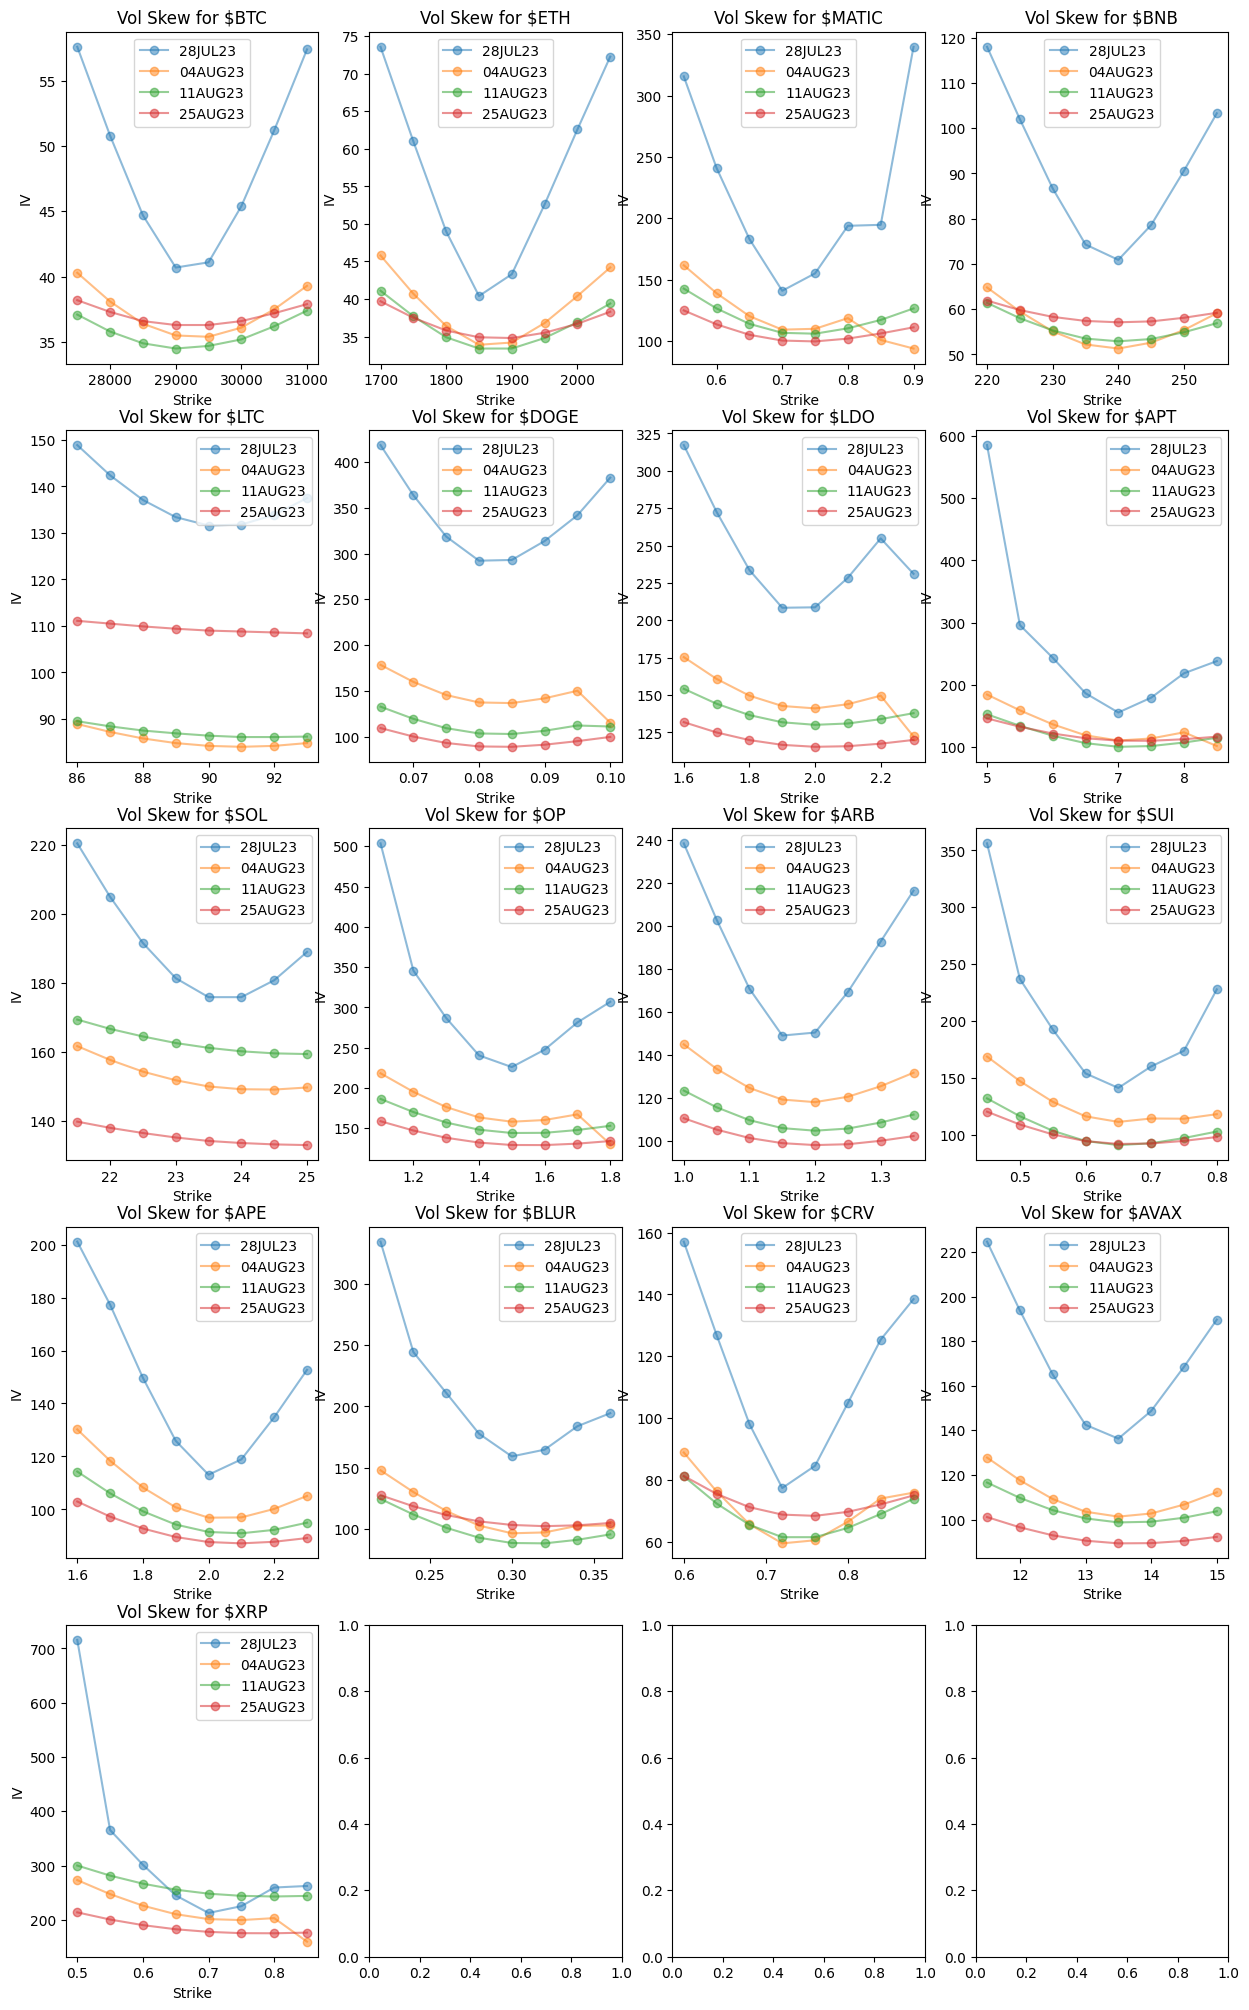

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = contracts
df["strike"] = df["strike"].astype(float)

df['date'] = df['expiration_date'].map(fmt_date_from_unix)

underlyers = df['underlyer'].unique()
print(underlyers, len(underlyers))


exp_dates = df['date'].unique()
# df.to_csv('my_data.csv', index=False)

n = len(underlyers)

r = int(np.ceil(n/4))

fig, axs = plt.subplots(r, 4, figsize=(15, r*5)) 

for idx, underlyer in enumerate(underlyers):

    row = idx//4
    col = idx % 4

    df_underlyer = df.loc[df['underlyer'] == underlyer]

    underlyer_spot_ref = float(df_underlyer["spot_ref"].iloc[0])

    for exp_date in exp_dates:
        df_exp_date_with_rpt = df_underlyer.loc[df_underlyer['date'] == exp_date]

        df_exp_date = df_exp_date_with_rpt.drop_duplicates(
            ignore_index=True, subset=['description'])

        calldata = df_exp_date.loc[(df_exp_date['contract_type'] == 'call') & (
            df_exp_date['strike'] >= underlyer_spot_ref)]

        putdata = df_exp_date.loc[(df_exp_date['contract_type'] == 'put') & (
            df_exp_date['strike'] < underlyer_spot_ref)]

        totaldata = pd.concat([calldata, putdata])

        sorteddata = totaldata.sort_values(by=['strike'])

        strike_data = [float(stk) for stk in sorteddata['strike'].tolist()]
        iv_data = [float(iv) for iv in sorteddata['iv'].tolist()]

        axs[row, col].plot(strike_data[3:-2], iv_data[3:-2], marker='o', linestyle='-', alpha=0.5,label=exp_date)
        # dooms day options are so insane, so i ignore some deep otm contracts
        # axs[row, col].plot(strike_data, iv_data, marker='o', linestyle='-', alpha=0.5,label=exp_date)
        
        axs[row, col].set_title(f'Vol Skew for \${underlyer}')
        axs[row, col].set_xlabel('Strike')
        axs[row, col].set_ylabel('IV')

        axs[row, col].legend()

plt.show()